In [8]:
import pandas as pd

In [2]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

In [22]:
df = pd.read_excel('肿瘤数据.xlsx')

In [4]:
df.head()

,最大周长,最大凹陷度,平均凹陷度,最大面积,最大半径,平均灰度值,肿瘤性质
0,184.60,0.2654,0.14710,2019.0,25.38,17.33,0
1,158.80,0.1860,0.07017,1956.0,24.99,23.41,0
2,152.50,0.2430,0.12790,1709.0,23.57,25.53,1
3,98.87,0.2575,0.10520,567.7,14.91,26.50,0
4,152.20,0.1625,0.10430,1575.0,22.54,16.67,0


In [5]:
df.isnull().sum()

最大周长     0
最大凹陷度    0
平均凹陷度    0
最大面积     0
最大半径     0
平均灰度值    0
肿瘤性质     0
dtype: int64

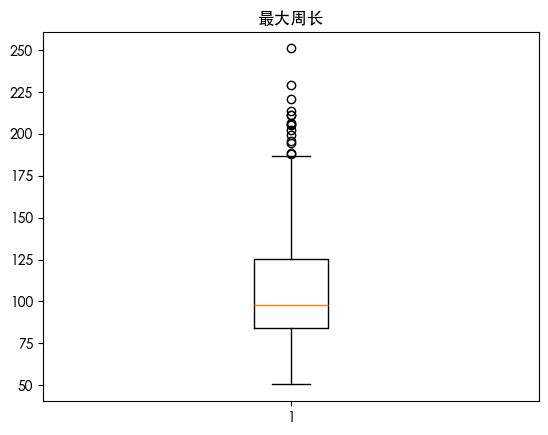

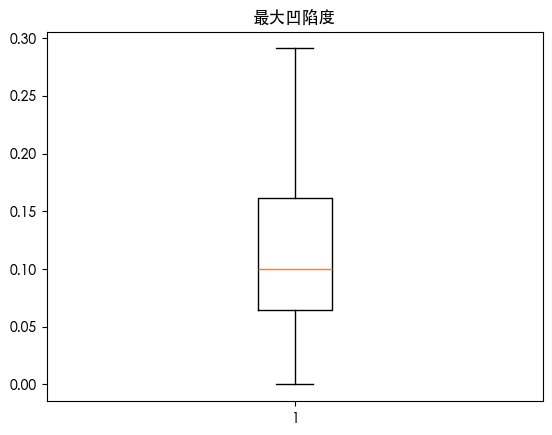

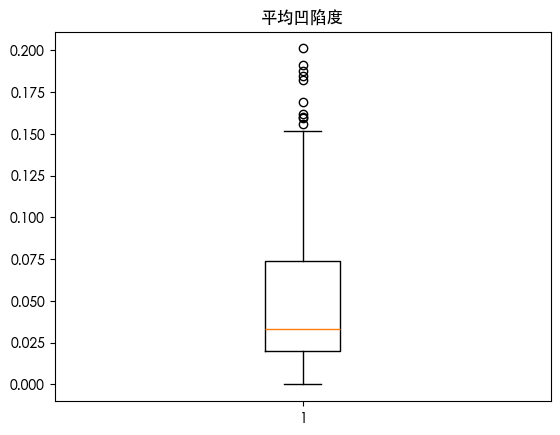

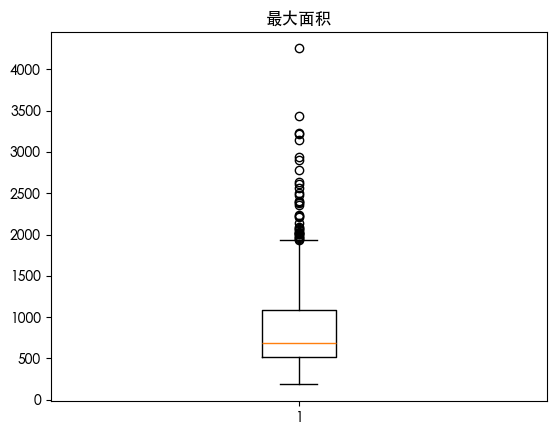

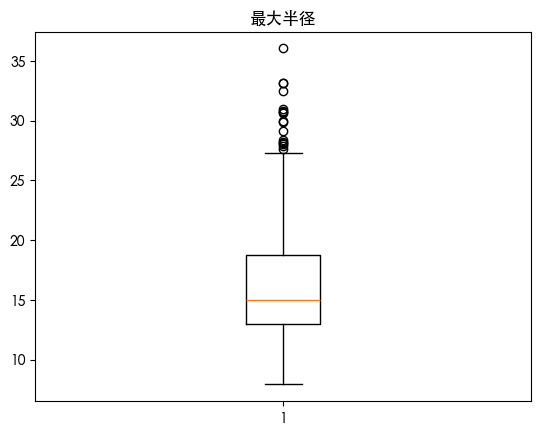

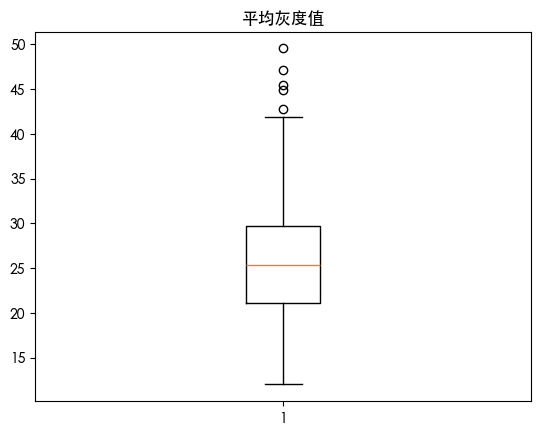

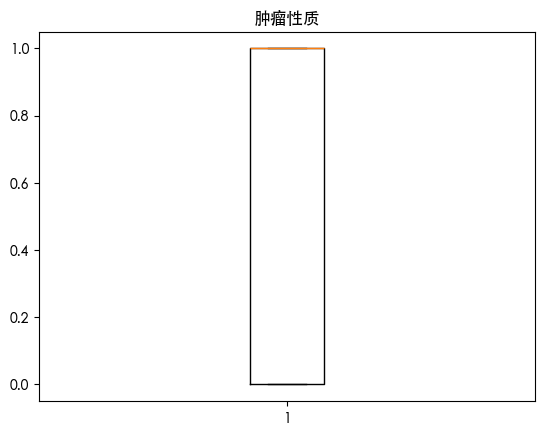

In [6]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['肿瘤性质'])
y = df['肿瘤性质']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_55348/3945754458.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_55348/3945754458.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_55348/3945754458.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yt/dl86x1493y18124bcx2hmh780000gn/T/ipykernel_55348/3945754458.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

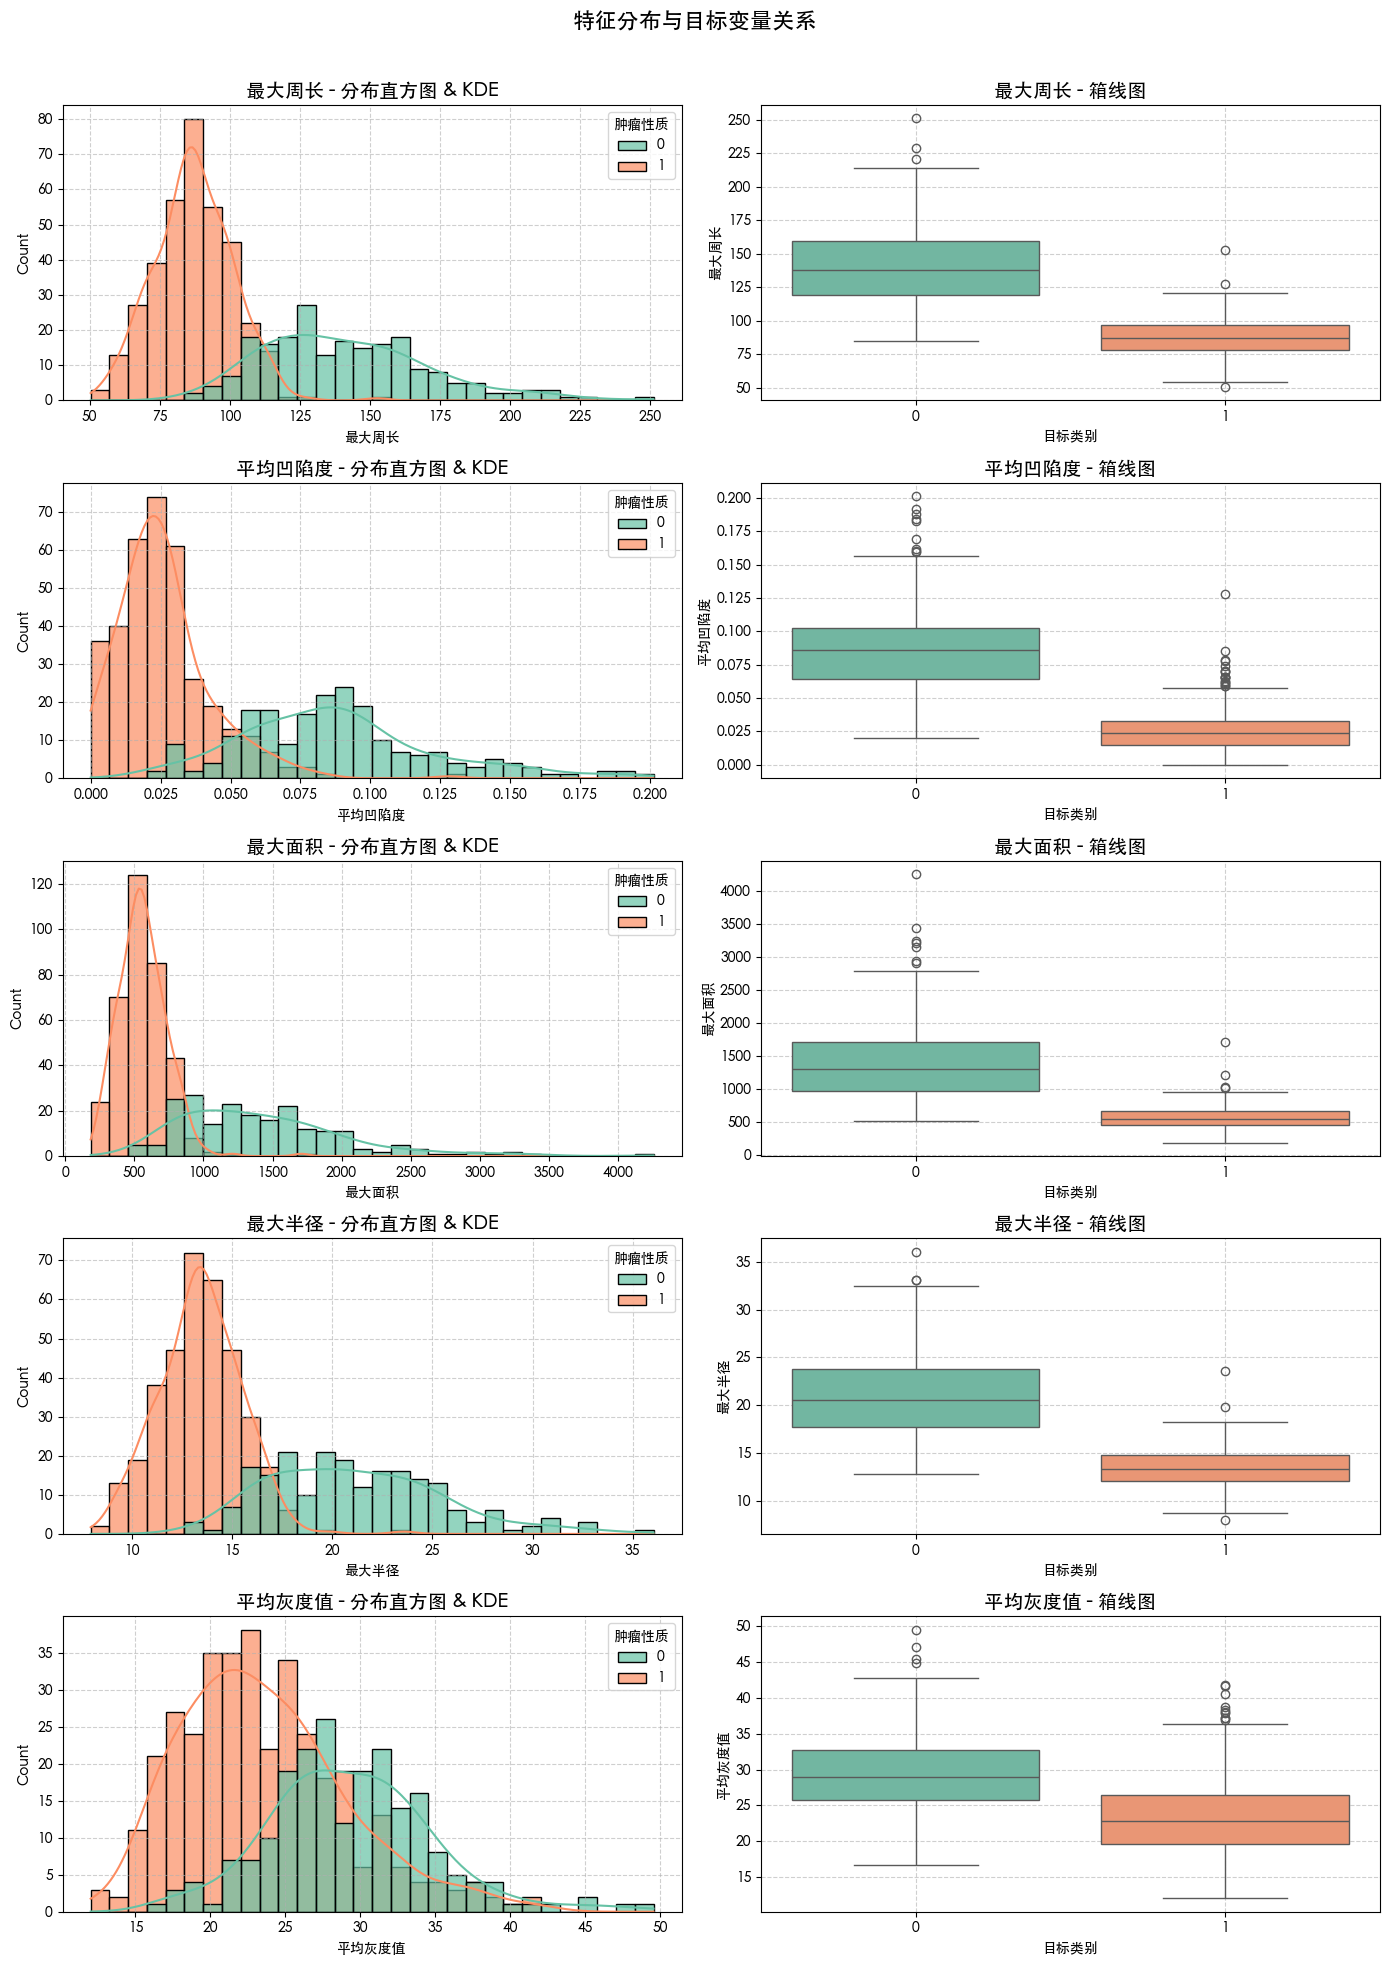

In [27]:
import seaborn as sns
cols = ['最大周长', '平均凹陷度', '最大面积', '最大半径', '平均灰度值']
target_col = '肿瘤性质'

n_cols = len(cols)
fig, axes = plt.subplots(n_cols, 2, figsize=(14, n_cols * 4))
fig.suptitle('特征分布与目标变量关系', fontsize=16, fontweight='bold')

for i, col in enumerate(cols):
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]

    sns.histplot(
        data=df,
        x=col,
        hue=target_col,
        kde=True,
        ax=ax1,
        bins=30,
        alpha=0.7,
        palette='Set2'
    )
    ax1.set_title(f'{col} - 分布直方图 & KDE', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.6)

    sns.boxplot(
        data=df,
        x=target_col,
        y=col,
        ax=ax2,
        palette='Set2'
    )
    ax2.set_title(f'{col} - 箱线图', fontsize=14)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.set_xlabel('目标类别')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

score_raw = cross_val_score(GaussianNB(), X, y, cv=5, scoring='f1').mean()

X_scaled = StandardScaler().fit_transform(X)
score_scaled = cross_val_score(GaussianNB(), X_scaled, y, cv=5, scoring='f1').mean()

X_robust = RobustScaler().fit_transform(X)
score_robust = cross_val_score(GaussianNB(), X_robust, y, cv=5, scoring='f1').mean()

X_log = np.log(X + 1)
score_log = cross_val_score(GaussianNB(), X_log, y, cv=5, scoring='f1').mean()

print(f"原始: {score_raw:.4f}")
print(f"标准化: {score_scaled:.4f}")
print(f"鲁棒缩放: {score_robust:.4f}")
print(f"对数变换: {score_log:.4f}")

原始: 0.9711
标准化: 0.9651
鲁棒缩放: 0.9651
对数变换: 0.9692


# 朴素贝叶斯

In [11]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9649122807017544
[[39  3]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# 逻辑回归

In [13]:
df = pd.read_excel('肿瘤数据.xlsx')

In [14]:
cols = ['最大周长', '平均凹陷度', '最大面积', '最大半径', '平均灰度值']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[f'{col}_is_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

df.head()

,最大周长,最大凹陷度,平均凹陷度,最大面积,最大半径,平均灰度值,肿瘤性质,最大周长_is_outlier,平均凹陷度_is_outlier,最大面积_is_outlier,最大半径_is_outlier,平均灰度值_is_outlier
0,184.60,0.2654,0.14710,2019.0,25.38,17.33,0,0,0,1,0,0
1,158.80,0.1860,0.07017,1956.0,24.99,23.41,0,0,0,1,0,0
2,152.50,0.2430,0.12790,1709.0,23.57,25.53,1,0,0,0,0,0
3,98.87,0.2575,0.10520,567.7,14.91,26.50,0,0,0,0,0,0
4,152.20,0.1625,0.10430,1575.0,22.54,16.67,0,0,0,0,0,0


In [15]:
X = df.drop(columns=['肿瘤性质'])
y = df['肿瘤性质']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.956140350877193
[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 决策树

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9210526315789473
[[37  5]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.93      0.94      0.94        72

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# XGBoost

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

print("XGB Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("XGB Confusion Matrix:\n", confusion_matrix(y_test, y_xgb_pred))
print("XGB Classification Report:\n", classification_report(y_test, y_xgb_pred))

XGB Accuracy: 0.956140350877193
XGB Confusion Matrix:
 [[39  3]
 [ 2 70]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:18:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# 随机森林

In [21]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators=100, random_state=42)
rm.fit(X_train, y_train)
y_rm_pred = rm.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_rm_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_rm_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_rm_pred))

Random Forest Accuracy: 0.956140350877193
Random Forest Confusion Matrix:
 [[39  3]
 [ 2 70]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

